DataCamp based on these criteria to assess my data skill at the time conducting this case study
https://www.datacamp.com/certificate/DA0019621540864

# DATA ANALYST CASE STUDY 
## TRAVEL ASSURED - TRAVEL INSURANCE COMPANY
### BUSINESS PROBLEM
Due to the COVID pandemic, they have had to cut their marketing budget by over 50%. It is more important than ever that **they advertise in the right places and to the right people**
Your presentation should be no longer than **ten minutes**. It should include **no more than eight slides of content**. You will be presenting to the CEO.
### WHAT THEY WANT TO KNOW 
* Are there differences in the travel habits between customers and non-customers 
* They believe they are more likely to travel often (buying tickets from frequent flyer miles) and travel abroad
* How my findings could help their marketing strategy

### INFORMATION SCHEMA (FEATURES DETAILS)

![FEATURES DETAILS](image/schema.png)

### IMPORTING ESSENTIAL RESOURCES


In [385]:

import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

customers = pd.read_csv('data/travel_insurance.csv')

### EXPLORATORY ANALYSIS
- Right now our company has 1987 customers
- Customers has average age of 30 years, (youngest: 25, oldest: 35)
- They all have a family whose size is 5 people (mininum: 2 people, maximum: 9 people)
- Frequent flyer: 20%, 


### FINDINGS
- Customers who are frequent flyer have 57% to buy travel insurance compared to 30% of customers who aren't
- Customers who have travelled abroad are three times (78%) more likely to get travel insurance than those who have not (25%)
- There is a strong correlation between Annual Income and Travel Insurance
  - Especially, people who have annual income greater than 1.3 million has more than 91 percent chance of getting a travel insurance
- Customers whose employment type belong to private sector/self-employed has 40% to get travel insurance, which is quite low chance, less desirable option compared to other group of customers 
- At some age (25, 26, 33, 34): people are more likely to buy travel insurance 

#### RECOMMENDATIONS
Focus on customers who has following characteristics to minimize marketing cost and maximize effciency of marketing strategy:
- Frequent flyer
- Have traveled abroad
- High income (>=1.2M)
- Aggressive promotion for customers who are 25, >30 years old

In [386]:
# customers['FrequentFlyer'] = [1 if isFrequent == "Yes" else 0 for isFrequent in customers.FrequentFlyer]
# customers['EverTravelledAbroad'] = [1 if haveEverTravelledAbroad == "Yes" else 0 for haveEverTravelledAbroad in customers.EverTravelledAbroad]
# customers['GraduateOrNot'] = [1 if isGraduate == "Yes" else 0 for isGraduate in customers.GraduateOrNot]
# customers['TravelInsurance'] = ["Yes" if haveInsurance == 1 else 'No' for haveInsurance in customers.TravelInsurance]
customers.head(5)




,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [387]:
customers.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [388]:
customers.corr()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
Age,1.000000,-0.020101,0.027409,0.007359,0.061060
AnnualIncome,-0.020101,1.000000,-0.015367,-0.001149,0.396763
FamilyMembers,0.027409,-0.015367,1.000000,0.028209,0.079909
ChronicDiseases,0.007359,-0.001149,0.028209,1.000000,0.018190
TravelInsurance,0.061060,0.396763,0.079909,0.018190,1.000000


In [389]:
##Functions setup
def my_crosstab(data, x, y, legend=None, showData=False):
  ct = pd.crosstab(data[x], data[y])
  if (showData):
    print(ct)
  ct.plot(kind='bar')
  if (legend):
    plt.legend(legend, loc='best')
  # if (xticklabels):
    # plt.xticks(labels=xticklabels)
  # if (yticklabels):
    # plt.yticks(labels=yticklabels)
  plt.show() 

In [390]:
# flyer_insurance = customers.groupby('FrequentFlyer')['TravelInsurance'].mean()
# print(flyer_insurance)
# print(pd.crosstab(customers.TravelInsurance, customers.FrequentFlyer, margins=True))
# print(pd.crosstab(customers.TravelInsurance, customers.FrequentFlyer, normalize=1, margins=True))


#### FINDINGS 2
Customers who have travelled abroad are three times (78%) more likely to get travel insurance than those who have not (25%).

EverTravelledAbroad
No     0.256378
Yes    0.784211
Name: TravelInsurance, dtype: float64
EverTravelledAbroad        No       Yes       All
TravelInsurance                                  
0                    0.743622  0.215789  0.642677
1                    0.256378  0.784211  0.357323


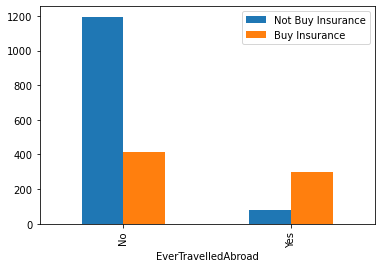

In [391]:
print(customers.groupby('EverTravelledAbroad')['TravelInsurance'].mean())
# pd.crosstab(customers.EverTravelledAbroad, customers.TravelInsurance)
print(pd.crosstab(customers.TravelInsurance, customers.EverTravelledAbroad, normalize=1, margins=True))
my_crosstab(customers, 'EverTravelledAbroad', 'TravelInsurance', legend=['Not Buy Insurance', 'Buy Insurance'])


### AnnualIncome vs. TravelInsurance
* There is a strong correlation between Annual Income and Travel Insurance
* Especially, people who have annual income greater than 1.3 million has more than 91 percent chance of getting a travel insurance

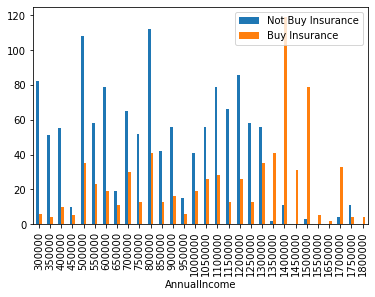

In [392]:
my_crosstab(customers, 'AnnualIncome', 'TravelInsurance', legend=['Not Buy Insurance', 'Buy Insurance'] )

In [393]:
more_1_3_million = customers.AnnualIncome > 1300000
n_people_more_1_3_million = sum(more_1_3_million)
n_people_less_1_3_million = customers.shape[0] - n_people_more_1_3_million
print(
  """People who have
  Annual income more than 1.3M: {}, has {} chances get travel insurance
  Annual income less than 1.3M: {}, has {} chances get travel insurance
      """.format(n_people_more_1_3_million, round(customers[more_1_3_million]['TravelInsurance'].mean(),2),
                 n_people_less_1_3_million, round(customers[~more_1_3_million]['TravelInsurance'].mean(),2)))


People who have
  Annual income more than 1.3M: 349, has 0.91 chances get travel insurance
  Annual income less than 1.3M: 1638, has 0.24 chances get travel insurance
      


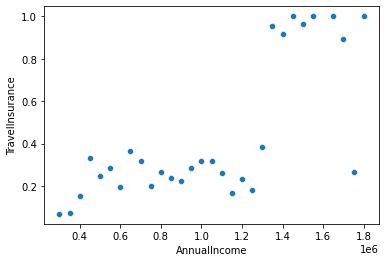

In [394]:
# sns.histplot(data = customers, x= 'AnnualIncome')
income_insurance = customers.groupby('AnnualIncome')['TravelInsurance'].mean()
fig, axes = plt.subplots(1, 1)
# axes.plot(income_insurance)
axes = sns.scatterplot(data =income_insurance)
plt.show()


**The frequency bar plot of each feature vs. travel insurance is shown below**

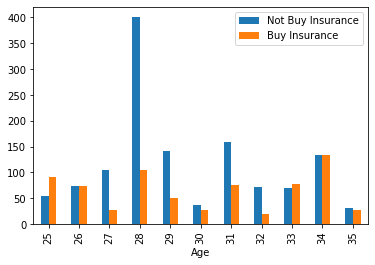

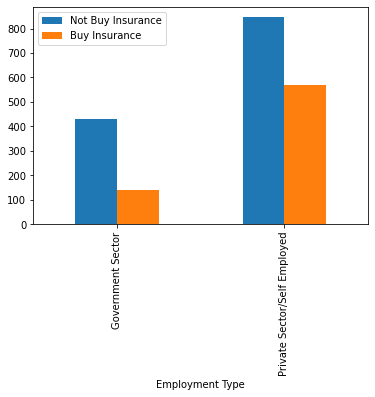

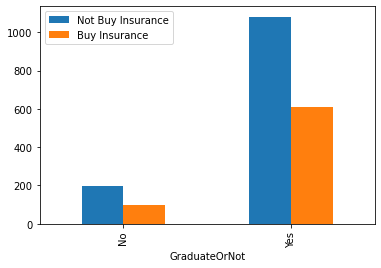

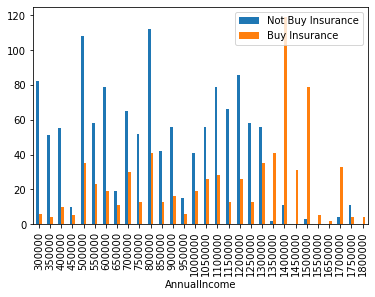

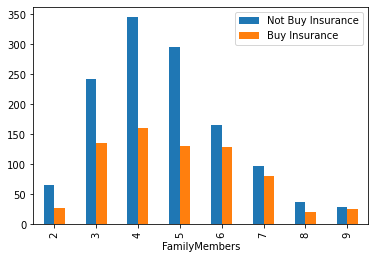

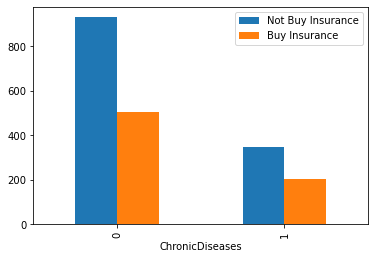

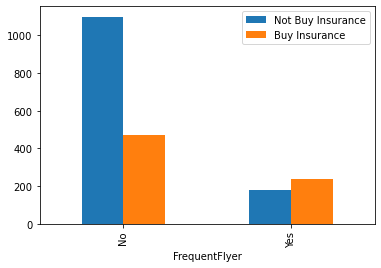

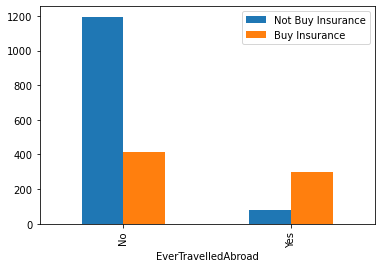

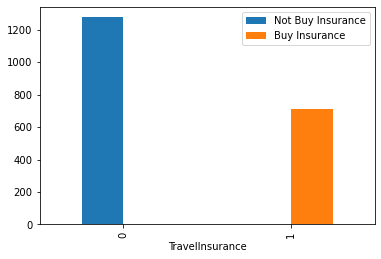

In [396]:
features = customers.columns
# len(features)
for feature in features:
  my_crosstab(customers, feature, 'TravelInsurance', legend=['Not Buy Insurance', 'Buy Insurance'], showData=False)